# 1. MNIST Digits
#### MNIST 손글씨 이미지를 딥러닝을 이용하여 분류하시오.

In [35]:
from keras.datasets import mnist
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [36]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [37]:
net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dense(512, activation='relu'))
net.add(layers.Dense(10, activation='softmax'))
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])

# preprocessing
X_train = X_train.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

In [38]:
net.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 12s 26ms/step - loss: 0.2127 - accuracy: 0.9350
Epoch 2/5
469/469 [==============================] - 12s 26ms/step - loss: 0.0770 - accuracy: 0.9765
Epoch 3/5
469/469 [==============================] - 12s 26ms/step - loss: 0.0488 - accuracy: 0.9851
Epoch 4/5
469/469 [==============================] - 12s 26ms/step - loss: 0.0380 - accuracy: 0.9882
Epoch 5/5
469/469 [==============================] - 12s 26ms/step - loss: 0.0301 - accuracy: 0.9903


In [39]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0892 - accuracy: 0.9764


In [40]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [41]:
val= net.fit(partial_X_train,partial_y_train,epochs=20, batch_size=128, validation_data=(X_val, y_val),verbose=1)

Epoch 1/20
391/391 [==============================] - 11s 27ms/step - loss: 0.0260 - accuracy: 0.9920 - val_loss: 0.0241 - val_accuracy: 0.9922
Epoch 2/20
391/391 [==============================] - 11s 27ms/step - loss: 0.0225 - accuracy: 0.9930 - val_loss: 0.0292 - val_accuracy: 0.9904
Epoch 3/20
391/391 [==============================] - 11s 28ms/step - loss: 0.0199 - accuracy: 0.9936 - val_loss: 0.0351 - val_accuracy: 0.9891
Epoch 4/20
391/391 [==============================] - 11s 28ms/step - loss: 0.0157 - accuracy: 0.9950 - val_loss: 0.0373 - val_accuracy: 0.9890
Epoch 5/20
391/391 [==============================] - 11s 28ms/step - loss: 0.0165 - accuracy: 0.9950 - val_loss: 0.0397 - val_accuracy: 0.9891
Epoch 6/20
391/391 [==============================] - 11s 28ms/step - loss: 0.0137 - accuracy: 0.9959 - val_loss: 0.0355 - val_accuracy: 0.9893
Epoch 7/20
391/391 [==============================] - 11s 28ms/step - loss: 0.0112 - accuracy: 0.9966 - val_loss: 0.0503 - val_accuracy:

In [42]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

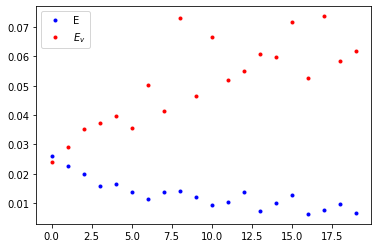

In [44]:
x = np.arange(0,len(loss))
plt.plot(x,loss,'b.',label='E')
plt.plot(x,val_loss,'r.',label='$E_v$')
plt.legend()

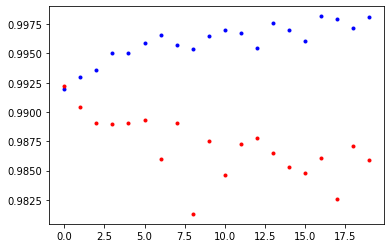

In [46]:
acc = val_dict['accuracy']
val_acc = val_dict['val_accuracy']
plt.plot(x,acc,'b.',label='Accuracy')
plt.plot(x,val_acc,'r.',label='A_v')

In [26]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(10, activation='softmax')) 
model.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [27]:
val2= model.fit(partial_X_train,partial_y_train,epochs=20, batch_size=128, validation_data=(X_val, y_val),verbose=0)

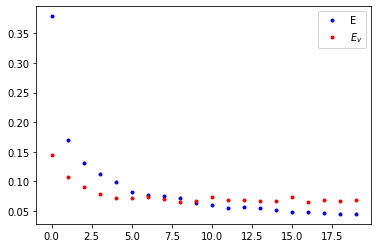

In [47]:
val_dict = val2.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

x = np.arange(0,len(loss))
plt.plot(x,loss,'b.',label='E')
plt.plot(x,val_loss,'r.',label='$E_v$')
plt.legend()

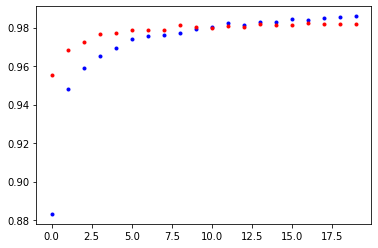

In [48]:
acc = val_dict['acc']
val_acc = val_dict['val_acc']
plt.plot(x,acc,'b.',label='Accuracy')
plt.plot(x,val_acc,'r.',label='A_v')

In [49]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1143 - accuracy: 0.9813


In [50]:
test_loss, test_acc = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0651 - acc: 0.9840
